<a href="https://colab.research.google.com/github/HarshataGarg/Mini-Projects/blob/main/Mini_Project_1_Live_Sketch_Using_Webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Project # 1 - Live Sketch Using Webcam

In [ ]:
import cv2
import numpy as np

# Our sketch generating function
def sketch(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Clean up image using Guassian Blur
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

    # Extract edges
    canny_edges = cv2.Canny(img_gray_blur, 50, 20)

    # Do an invert binarize the image
    ret, mask = cv2.threshold(canny_edges, 100, 255, cv2.THRESH_BINARY_INV)
    return mask


# Initialize webcam, cap is the object provided by VideoCapture
# It contains a boolean indicating if it was sucessful (ret)
# It also contains the images collected from the webcam (frame)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('Our Live Sketcher', sketch(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()

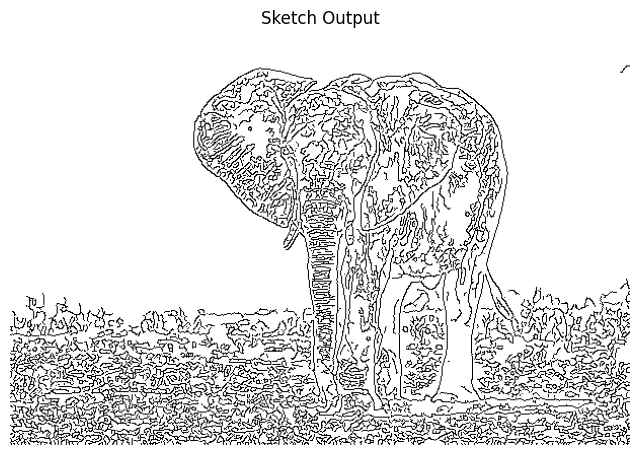

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Sketch generating function
def sketch(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    canny_edges = cv2.Canny(img_gray_blur, 50, 20)
    ret, mask = cv2.threshold(canny_edges, 100, 255, cv2.THRESH_BINARY_INV)
    return mask

# Read the uploaded image
image = cv2.imread('myimage.jpg')

if image is None:
    print("Error: Could not load image.")
else:
    # Apply the sketch effect
    result = sketch(image)

    # Display using matplotlib
    plt.figure(figsize=(8,8))
    plt.imshow(result, cmap='gray')
    plt.title('Sketch Output')
    plt.axis('off')
    plt.show()
